In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv('Lasso_selected_ch4.csv')   
df.shape

(12417, 133)

In [2]:
df.head(3)

,Area_22,Area_23,Area_24,Area_25,Area_26,Area_35,Area_36,Area_37,Asset2,Asset7,...,TAssetC1,TAssetC2,TAssetC3,TAssetC4,TAssetC5,TAssetC6,TAssetC8,TradeMark1,emp6,emp66
0,0,0,0,0,0,0,0,0,9.945205,9.474088,...,6.146329,0.000000,0.000000,0.0,0.000000,4.595120,5.877736,NaN,3.688879,0.0
1,0,0,0,0,0,0,0,0,11.776105,12.201834,...,4.875197,0.000000,0.000000,0.0,0.000000,0.000000,4.488636,1.791759,5.068904,0.0
2,0,0,0,0,0,0,0,0,9.295325,9.871119,...,5.726848,4.770685,0.693147,0.0,5.056246,2.890372,0.000000,3.258097,3.951244,0.0


In [14]:
# SimpleInputer의 add_indicator 옵션을 제거한 버전.

data = df.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장.
target = df['EBizSystem2']                # 타겟변수만 target에 저장.

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의. 

# interval 변수의 null value를 평균(mean)으로 impute. 
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean')  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의.

print("X_train2 shape:", X_train2.shape) 
print("X_test2 shape:", X_test2.shape) 

X_train2 shape: (6208, 132)
X_test2 shape: (6209, 132)


In [15]:
# Logistic Regression 모형 (Default 모델).
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf_lr = LogisticRegression(solver='lbfgs',penalty='none',max_iter=10000,random_state=0,\
                            n_jobs=-1)
clf_lr.fit(X_train2, y_train)
pred = clf_lr.predict(X_test2)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성.
accuracy = accuracy_score(y_test, pred)

In [ ]:
# 워닝을 피하기 위해 위의 max_iter를 10,000으로 설정해야 함에 주의.
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(clf_lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_lr.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_)) 

In [16]:
import time
start = time.time()

# 워닝을 피하기 위해 위의 max_iter를 10,000으로 설정해야 함에 주의.
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(clf_lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_lr.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_)) 

end = time.time()
print(f"Runtime of the program is {end - start}")

GridSearchCV max accuracy:0.73131
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'saga'}
Runtime of the program is 49.57301926612854


In [18]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.73168
ROC AUC on test set:0.78772


In [6]:
print('절편', best_clf.intercept_)
print('회귀계수', np.round(best_clf.coef_, 2))

절편 [-3.62293761]
회귀계수 [[-0.14 -0.11  0.3  -0.22 -0.28 -0.01  0.08  0.05  0.31  0.26 -0.15  0.06
   0.02 -0.28  0.02 -0.2   0.04 -0.14 -0.02  0.01 -0.49  0.6   0.05  0.27
   0.11  0.29  0.28  0.38  0.27  0.15  0.31  0.05 -0.06 -0.02  0.01 -0.02
  -0.01 -0.52 -0.05  0.09  0.02 -0.02  0.52 -1.69 -0.04  0.28 -0.56  0.62
   0.36 -0.46  0.11  0.46  0.26  0.15  0.03 -0.01 -0.49 -0.26 -0.69 -0.28
   0.05  0.45 -0.51 -0.53  0.16  0.15 -0.29 -0.26  0.18 -0.54 -0.3  -0.33
  -0.18 -0.38  0.13  0.17  0.07  0.07  0.35  0.23  1.44 -0.3  -0.51  0.33
  -0.59  0.27 -0.32  1.11 -0.27  0.79  0.87 -0.18 -0.4   0.37 -0.28  0.18
   0.04  0.01 -0.    0.09 -0.32 -0.24  0.2   0.06  0.2   0.39 -0.09  0.19
   0.25  0.19 -0.01 -0.38 -0.32  0.67  0.06  0.02 -0.05  0.34  0.48  0.23
   0.   -0.01 -0.    0.02  0.    0.02 -0.01  0.14 -0.31  0.09 -0.03 -0.41]]


In [11]:
print('절편', best_clf.intercept_)
print('회귀계수', np.round(best_clf.coef_, 3))

절편 [-3.92872069]
회귀계수 [[-1.260e-01 -1.570e-01  2.880e-01 -2.270e-01 -2.500e-01  3.220e-01
   2.800e-01 -1.470e-01  5.800e-02  6.000e-03 -4.000e-03  2.700e-02
  -9.000e-03 -5.160e-01  2.340e-01  2.800e-01  2.810e-01  3.710e-01
   1.560e-01  3.380e-01  4.900e-02 -5.400e-02 -3.000e-02  1.000e-02
  -1.100e-02 -4.700e-02  1.060e-01  2.700e-02 -1.709e+00  3.690e-01
   5.830e-01  2.960e-01 -4.620e-01  8.700e-02  4.370e-01  2.230e-01
   1.360e-01  3.500e-02  8.000e-03 -2.530e-01 -9.200e-01 -6.460e-01
   5.000e-02  5.370e-01 -5.100e-01 -4.760e-01 -2.550e-01 -2.690e-01
  -3.180e-01 -1.600e-01  1.470e-01  9.000e-02  3.620e-01  1.638e+00
  -5.100e-01  3.760e-01 -5.790e-01 -2.050e-01  8.840e-01 -1.630e-01
  -6.460e-01  1.150e-01 -8.130e-01  1.710e-01  4.000e-02 -2.000e-03
   1.520e-01 -3.370e-01 -2.200e-01  2.100e-01  1.980e-01  4.090e-01
  -9.700e-02  1.870e-01  2.520e-01  1.790e-01 -1.600e-02 -3.610e-01
  -3.030e-01  6.590e-01  8.700e-02  1.000e-02 -1.000e-03  3.450e-01
   5.080e-01  2.690e-01  7

In [19]:
print ("Number of features used:", np.sum(best_clf.coef_ != 0))

Number of features used: 132


In [20]:
print ("Number of features not used:", np.sum(best_clf.coef_ == 0))

Number of features not used: 0


In [22]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기. 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기.
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names,\
                   columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=True)   # 컬럼 coef의 값들을 오름차순으로 정리.
dft1                                            

,coef
EBizSystem10,-1.689
IndCategory1_encoded_13,-0.693
IndCategory2_47,-0.585
EBizSystem12_4,-0.557
IndCategory2_15,-0.539
...,...
ParentCompany1,0.668
IndCategory2_69,0.788
IndCategory2_71,0.868
IndCategory2_61,1.110


In [23]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기. 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기.
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,\
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=True)   # 컬럼 coef의 값들을 오름차순으로 정리.
dft1                                            

,Odds_ratio
EBizSystem10,0.185
IndCategory1_encoded_13,0.500
IndCategory2_47,0.557
EBizSystem12_4,0.573
IndCategory2_15,0.584
...,...
ParentCompany1,1.951
IndCategory2_69,2.198
IndCategory2_71,2.381
IndCategory2_61,3.034


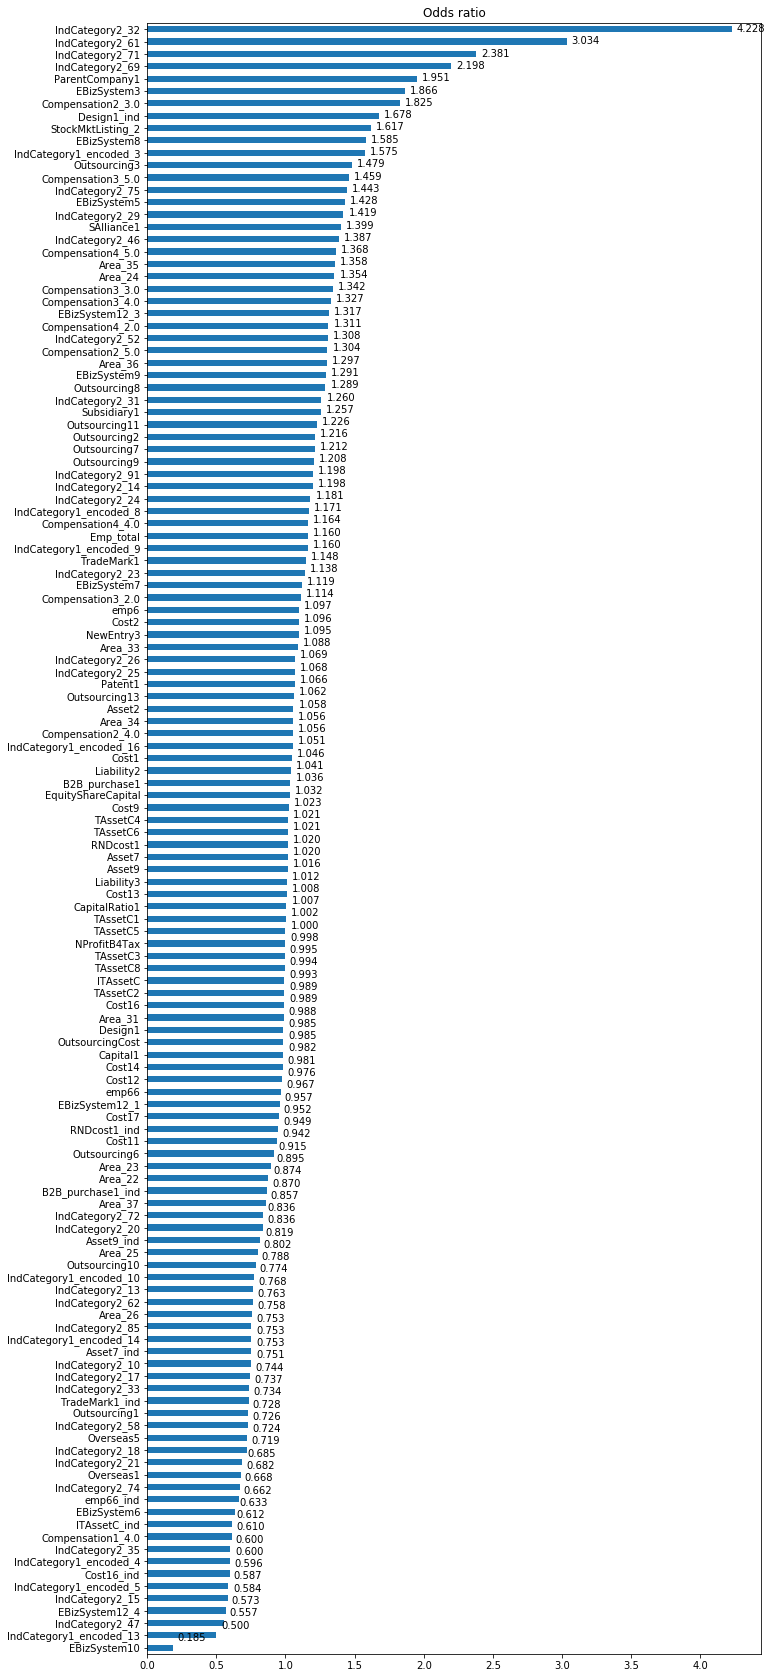

In [24]:
# 막대그래프(plot.barh) 그리기.
import matplotlib.pyplot as plt
%matplotlib inline
ax = dft1.plot.barh(title="Odds ratio", figsize=(11,30))
ax.get_legend().remove()   # 이걸 넣어야 legend box가 하단 좌득에 놓여서 그래프 읽는 것을 방해하는 것을 방지.
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()*0.994),\
                xytext=(5, 10), textcoords='offset points')

In [25]:
import statsmodels.api as sm 
log_reg = sm.Logit(y_train, X_train2).fit(maxiter=50000)

Optimization terminated successfully.
         Current function value: 0.519417
         Iterations 7


In [26]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:            EBizSystem2   No. Observations:                 6208
Model:                          Logit   Df Residuals:                     6078
Method:                           MLE   Df Model:                          129
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                  0.2411
Time:                        00:21:11   Log-Likelihood:                -3224.5
converged:                       True   LL-Null:                       -4248.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1905      0.182     -1.048      0.295      -0.547       0.166
x2            -0.1718      0.155     -1.106      0.269      -0.476       0.133
x3             0.2545      0.235      1.084      0.2

/Users/sunjipyim2/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/sunjipyim2/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/sunjipyim2/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/sunjipyim2/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
